In [32]:
import pandas as pd

missing_values = ["n/a", "na", "--"]
df = pd.read_csv('McD_Reviews.csv', encoding="ISO-8859-1")

In [33]:
df = df.drop(['reviewer_id', 'store_name', 'category', 'store_address',
         'longitude', 'rating_count', 'review_time', 'latitude '], axis = 1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  33396 non-null  object
 1   rating  33396 non-null  object
dtypes: object(2)
memory usage: 521.9+ KB


In [35]:
df.isna().sum()

review    0
rating    0
dtype: int64

In [36]:
df.head(1000)

,review,rating
0,Why does it look like someone spit on my food?...,1 star
1,It'd McDonalds. It is what it is as far as the...,4 stars
2,Made a mobile order got to the speaker and che...,1 star
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...
995,This place is the one in front of the Lehigh V...,1 star
996,The service at the drive in was terrible.i sat...,1 star
997,Their cheeseburger costs more than a double ch...,1 star
998,Good service. Everything good here.,4 stars


In [38]:
import regex as re

def tokenize(text):
    split=re.split("\W+",text)
    return split
df['review_split']=df['review'].apply(lambda x: tokenize(x.lower()))
df.head(100)

,review,rating,review_split
0,Why does it look like someone spit on my food?...,1 star,"[why, does, it, look, like, someone, spit, on,..."
1,It'd McDonalds. It is what it is as far as the...,4 stars,"[it, d, mcdonalds, it, is, what, it, is, as, f..."
2,Made a mobile order got to the speaker and che...,1 star,"[made, a, mobile, order, got, to, the, speaker..."
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,"[my, mc, crispy, chicken, sandwich, was, ï, ï,..."
4,"I repeat my order 3 times in the drive thru, a...",1 star,"[i, repeat, my, order, 3, times, in, the, driv..."
...,...,...,...
95,If I could give negative stars I would. This l...,1 star,"[if, i, could, give, negative, stars, i, would..."
96,When ordering food the employees conveniently ...,1 star,"[when, ordering, food, the, employees, conveni..."
97,I donï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,1 star,"[i, donï, ï, ï, ï, ï, ï, ï, ï, ï, ï, ï, ï, ï, ..."
98,Allways has the best Fries and Ice cream in th...,5 stars,"[allways, has, the, best, fries, and, ice, cre..."


In [39]:
import nltk as nltk
from nltk import corpus
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
df['review_text_stopwords'] = df['review_split'].apply(lambda x: remove_stopwords(x))
df.head(1000)

,review,rating,review_split,review_text_stopwords
0,Why does it look like someone spit on my food?...,1 star,"[why, does, it, look, like, someone, spit, on,...","[look, like, someone, spit, food, normal, tran..."
1,It'd McDonalds. It is what it is as far as the...,4 stars,"[it, d, mcdonalds, it, is, what, it, is, as, f...","[mcdonalds, far, food, atmosphere, go, staff, ..."
2,Made a mobile order got to the speaker and che...,1 star,"[made, a, mobile, order, got, to, the, speaker...","[made, mobile, order, got, speaker, checked, l..."
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,"[my, mc, crispy, chicken, sandwich, was, ï, ï,...","[mc, crispy, chicken, sandwich, ï, ï, ï, ï, ï,..."
4,"I repeat my order 3 times in the drive thru, a...",1 star,"[i, repeat, my, order, 3, times, in, the, driv...","[repeat, order, 3, times, drive, thru, still, ..."
...,...,...,...,...
995,This place is the one in front of the Lehigh V...,1 star,"[this, place, is, the, one, in, front, of, the...","[place, one, front, lehigh, valley, mall, go, ..."
996,The service at the drive in was terrible.i sat...,1 star,"[the, service, at, the, drive, in, was, terrib...","[service, drive, terrible, sat, line, 20min, o..."
997,Their cheeseburger costs more than a double ch...,1 star,"[their, cheeseburger, costs, more, than, a, do...","[cheeseburger, costs, double, cheeseburger, gi..."
998,Good service. Everything good here.,4 stars,"[good, service, everything, good, here, ]","[good, service, everything, good, ]"


In [41]:
stemmer = nltk.stem.SnowballStemmer(language='english')
def stem_list(row):
    my_list = row['review_text_stopwords']
    stemmed_list = [stemmer.stem(word) for word in my_list]
    return (stemmed_list)

df['stemmed_review'] = df.apply(stem_list, axis=1)

In [42]:
df.head()

,review,rating,review_split,review_text_stopwords,stemmed_review
0,Why does it look like someone spit on my food?...,1 star,"[why, does, it, look, like, someone, spit, on,...","[look, like, someone, spit, food, normal, tran...","[look, like, someon, spit, food, normal, trans..."
1,It'd McDonalds. It is what it is as far as the...,4 stars,"[it, d, mcdonalds, it, is, what, it, is, as, f...","[mcdonalds, far, food, atmosphere, go, staff, ...","[mcdonald, far, food, atmospher, go, staff, ma..."
2,Made a mobile order got to the speaker and che...,1 star,"[made, a, mobile, order, got, to, the, speaker...","[made, mobile, order, got, speaker, checked, l...","[made, mobil, order, got, speaker, check, line..."
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,"[my, mc, crispy, chicken, sandwich, was, ï, ï,...","[mc, crispy, chicken, sandwich, ï, ï, ï, ï, ï,...","[mc, crispi, chicken, sandwich, ï, ï, ï, ï, ï,..."
4,"I repeat my order 3 times in the drive thru, a...",1 star,"[i, repeat, my, order, 3, times, in, the, driv...","[repeat, order, 3, times, drive, thru, still, ...","[repeat, order, 3, time, drive, thru, still, m..."


In [44]:
def rating_group(rate):
    group = rate['rating']
    global grouped_rate
    if rate['rating'] > '3 stars':
        grouped_rate = 'Good'
    elif rate['rating'] == '3 stars':
        grouped_rate = 'Neutral'
    elif rate['rating'] < '3 stars':
        grouped_rate = 'Bad'
    return grouped_rate

df['new_rating'] = df.apply(rating_group, axis=1)

In [45]:
df.head(1000)

,review,rating,review_split,review_text_stopwords,stemmed_review,new_rating
0,Why does it look like someone spit on my food?...,1 star,"[why, does, it, look, like, someone, spit, on,...","[look, like, someone, spit, food, normal, tran...","[look, like, someon, spit, food, normal, trans...",Bad
1,It'd McDonalds. It is what it is as far as the...,4 stars,"[it, d, mcdonalds, it, is, what, it, is, as, f...","[mcdonalds, far, food, atmosphere, go, staff, ...","[mcdonald, far, food, atmospher, go, staff, ma...",Good
2,Made a mobile order got to the speaker and che...,1 star,"[made, a, mobile, order, got, to, the, speaker...","[made, mobile, order, got, speaker, checked, l...","[made, mobil, order, got, speaker, check, line...",Bad
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,"[my, mc, crispy, chicken, sandwich, was, ï, ï,...","[mc, crispy, chicken, sandwich, ï, ï, ï, ï, ï,...","[mc, crispi, chicken, sandwich, ï, ï, ï, ï, ï,...",Good
4,"I repeat my order 3 times in the drive thru, a...",1 star,"[i, repeat, my, order, 3, times, in, the, driv...","[repeat, order, 3, times, drive, thru, still, ...","[repeat, order, 3, time, drive, thru, still, m...",Bad
...,...,...,...,...,...,...
995,This place is the one in front of the Lehigh V...,1 star,"[this, place, is, the, one, in, front, of, the...","[place, one, front, lehigh, valley, mall, go, ...","[place, one, front, lehigh, valley, mall, go, ...",Bad
996,The service at the drive in was terrible.i sat...,1 star,"[the, service, at, the, drive, in, was, terrib...","[service, drive, terrible, sat, line, 20min, o...","[servic, drive, terribl, sat, line, 20min, one...",Bad
997,Their cheeseburger costs more than a double ch...,1 star,"[their, cheeseburger, costs, more, than, a, do...","[cheeseburger, costs, double, cheeseburger, gi...","[cheeseburg, cost, doubl, cheeseburg, give, do...",Bad
998,Good service. Everything good here.,4 stars,"[good, service, everything, good, here, ]","[good, service, everything, good, ]","[good, servic, everyth, good, ]",Good


In [46]:
df.tail(1000)

,review,rating,review_split,review_text_stopwords,stemmed_review,new_rating
32396,I live 150 feet away and waited an hour to pla...,1 star,"[i, live, 150, feet, away, and, waited, an, ho...","[live, 150, feet, away, waited, hour, place, o...","[live, 150, feet, away, wait, hour, place, ord...",Bad
32397,the slowest mc Donalds in the world! It is su...,2 stars,"[the, slowest, mc, donalds, in, the, world, it...","[slowest, mc, donalds, world, supposed, 24, ho...","[slowest, mc, donald, world, suppos, 24, hour,...",Bad
32398,"Biscayne Blvd., and 35th Street\nBased upon wh...",1 star,"[biscayne, blvd, and, 35th, street, based, upo...","[biscayne, blvd, 35th, street, based, upon, ob...","[biscayn, blvd, 35th, street, base, upon, obse...",Bad
32399,For the third time in the morning this is happ...,1 star,"[for, the, third, time, in, the, morning, this...","[third, time, morning, happened, drive, lady, ...","[third, time, morn, happen, drive, ladi, answe...",Bad
32400,more than two hours waiting and I left without...,1 star,"[more, than, two, hours, waiting, and, i, left...","[two, hours, waiting, left, without, order, ru...","[two, hour, wait, left, without, order, rude, ...",Bad
...,...,...,...,...,...,...
33391,They treated me very badly.,1 star,"[they, treated, me, very, badly, ]","[treated, badly, ]","[treat, bad, ]",Bad
33392,The service is very good,5 stars,"[the, service, is, very, good]","[service, good]","[servic, good]",Good
33393,To remove hunger is enough,4 stars,"[to, remove, hunger, is, enough]","[remove, hunger, enough]","[remov, hunger, enough]",Good
33394,"It's good, but lately it has become very expen...",5 stars,"[it, s, good, but, lately, it, has, become, ve...","[good, lately, become, expensive, ]","[good, late, becom, expens, ]",Good


In [48]:
rating_category = pd.get_dummies(df.new_rating)
df_new = pd.concat([df, rating_category], axis=1)
df_new = df_new.drop(columns='rating')
df_new

,review,review_split,review_text_stopwords,stemmed_review,new_rating,Bad,Good,Neutral
0,Why does it look like someone spit on my food?...,"[why, does, it, look, like, someone, spit, on,...","[look, like, someone, spit, food, normal, tran...","[look, like, someon, spit, food, normal, trans...",Bad,1,0,0
1,It'd McDonalds. It is what it is as far as the...,"[it, d, mcdonalds, it, is, what, it, is, as, f...","[mcdonalds, far, food, atmosphere, go, staff, ...","[mcdonald, far, food, atmospher, go, staff, ma...",Good,0,1,0
2,Made a mobile order got to the speaker and che...,"[made, a, mobile, order, got, to, the, speaker...","[made, mobile, order, got, speaker, checked, l...","[made, mobil, order, got, speaker, check, line...",Bad,1,0,0
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,"[my, mc, crispy, chicken, sandwich, was, ï, ï,...","[mc, crispy, chicken, sandwich, ï, ï, ï, ï, ï,...","[mc, crispi, chicken, sandwich, ï, ï, ï, ï, ï,...",Good,0,1,0
4,"I repeat my order 3 times in the drive thru, a...","[i, repeat, my, order, 3, times, in, the, driv...","[repeat, order, 3, times, drive, thru, still, ...","[repeat, order, 3, time, drive, thru, still, m...",Bad,1,0,0
...,...,...,...,...,...,...,...,...
33391,They treated me very badly.,"[they, treated, me, very, badly, ]","[treated, badly, ]","[treat, bad, ]",Bad,1,0,0
33392,The service is very good,"[the, service, is, very, good]","[service, good]","[servic, good]",Good,0,1,0
33393,To remove hunger is enough,"[to, remove, hunger, is, enough]","[remove, hunger, enough]","[remov, hunger, enough]",Good,0,1,0
33394,"It's good, but lately it has become very expen...","[it, s, good, but, lately, it, has, become, ve...","[good, lately, become, expensive, ]","[good, late, becom, expens, ]",Good,0,1,0


In [49]:
review = df_new['stemmed_review'].values
label = df_new[['Good', 'Neutral', 'Bad']].values
label

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [50]:
from sklearn.model_selection import train_test_split

review_train, review_test,label_train, label_test = train_test_split(review, label, test_size=0.2, shuffle=False)

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(review_train)
tokenizer.fit_on_texts(review_test)

sequence_train = tokenizer.texts_to_sequences(review_train)
sequence_test = tokenizer.texts_to_sequences(review_test)

padded_train = pad_sequences(sequence_train, padding='post', maxlen=20, truncating='post')
padded_test = pad_sequences(sequence_test, padding='post', maxlen=20, truncating='post')

In [52]:
import tensorflow as tf

model = tf.keras.Sequential([
     tf.keras.layers.Embedding(input_dim=50000, output_dim=16),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.LSTM(128),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(3, activation='softmax')
     ])

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [53]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy' and 'val_accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [54]:
num_epochs = 100
history = model.fit(padded_train, label_train,
                    batch_size=128, epochs=num_epochs, callbacks=[callbacks],
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/100
209/209 - 18s - loss: 0.6973 - accuracy: 0.7205 - val_loss: 0.8490 - val_accuracy: 0.7680 - 18s/epoch - 86ms/step
Epoch 2/100
209/209 - 15s - loss: 0.5795 - accuracy: 0.7769 - val_loss: 0.6455 - val_accuracy: 0.7879 - 15s/epoch - 72ms/step
Epoch 3/100
209/209 - 14s - loss: 0.5342 - accuracy: 0.7991 - val_loss: 0.4800 - val_accuracy: 0.8195 - 14s/epoch - 66ms/step
Epoch 4/100
209/209 - 15s - loss: 0.4947 - accuracy: 0.8127 - val_loss: 0.4624 - val_accuracy: 0.8240 - 15s/epoch - 72ms/step
Epoch 5/100
209/209 - 14s - loss: 0.4715 - accuracy: 0.8197 - val_loss: 0.4371 - val_accuracy: 0.8337 - 14s/epoch - 66ms/step
Epoch 6/100
209/209 - 14s - loss: 0.4593 - accuracy: 0.8252 - val_loss: 0.4571 - val_accuracy: 0.8367 - 14s/epoch - 66ms/step
Epoch 7/100
209/209 - 14s - loss: 0.4454 - accuracy: 0.8334 - val_loss: 0.4293 - val_accuracy: 0.8464 - 14s/epoch - 66ms/step
Epoch 8/100
209/209 - 15s - loss: 0.4237 - accuracy: 0.8395 - val_loss: 0.4221 - val_accuracy: 0.8488 - 15s/epoch - 73

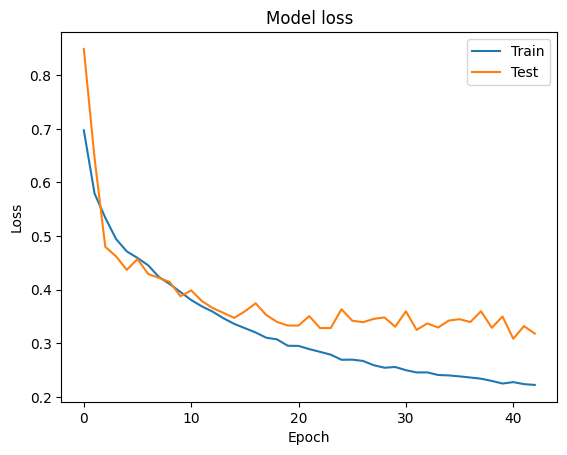

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

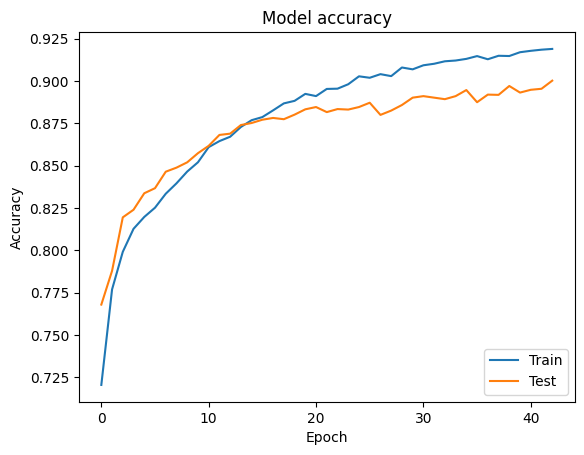

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()